In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import random
t = pd.read_csv('cdata.csv')

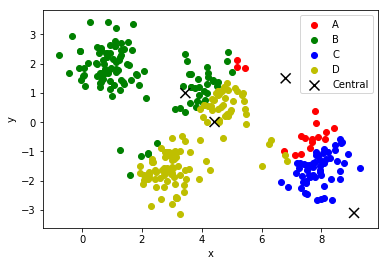

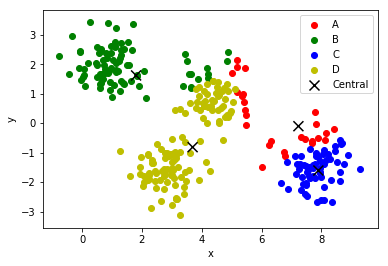

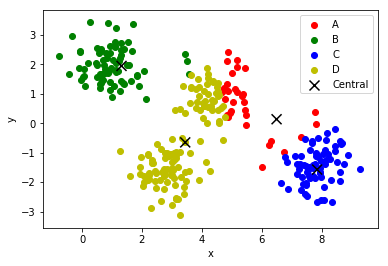

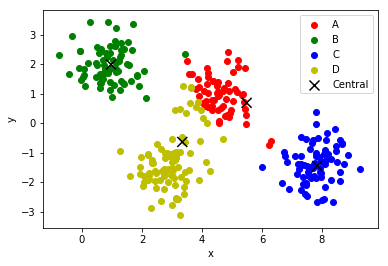

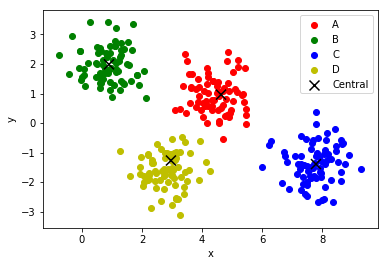

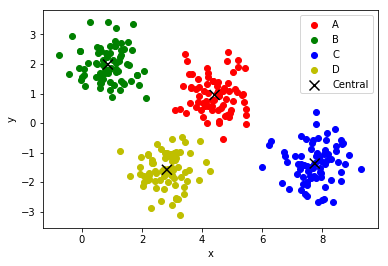

In [21]:
#隨機挑四個點
point_x = [random.uniform(min(t['x']),max(t['x'])) for i in range(4)]
point_y = [random.uniform(min(t['y']),max(t['y'])) for i in range(4)]
SSE = []
while True:
    SSE1 = 0
    x_list = [[],[],[],[]]
    y_list = [[],[],[],[]]
    #將同群的點放入同一個串列
    for i in range(300):
        dis_list = []
        for j in range(4):
            distance = ((t['x'][i] - point_x[j])**2 + (t['y'][i] - point_y[j])**2)**(1/2)
            dis_list.append(distance)
        SSE1 += min(dis_list)
        min_index = dis_list.index(min(dis_list))
        x_list[min_index].append(t['x'][i])
        y_list[min_index].append(t['y'][i])
    SSE.append(SSE1)
    #不同群的點印出不同顏色
    if len(SSE) == 1:
        plt.scatter(x_list[0],y_list[0],c="r",label="A")
        plt.scatter(x_list[1],y_list[1],c="g",label="B")
        plt.scatter(x_list[2],y_list[2],c="b",label="C")
        plt.scatter(x_list[3],y_list[3],c="y",label="D")
        plt.scatter(point_x,point_y,c="k",label="Central",marker="x",sizes=[100,100,100,100])
        plt.legend()
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()
    else:
        #SSE不變
        if SSE[len(SSE)-1] == SSE[len(SSE)-2]:
            break
        else:
            plt.scatter(x_list[0],y_list[0],c="r",label="A")
            plt.scatter(x_list[1],y_list[1],c="g",label="B")
            plt.scatter(x_list[2],y_list[2],c="b",label="C")
            plt.scatter(x_list[3],y_list[3],c="y",label="D")
            plt.scatter(point_x,point_y,c="k",label="Central",marker="x",sizes=[100,100,100,100])
            plt.legend()
            plt.xlabel('x')
            plt.ylabel('y')
            plt.show()
    #用平均座標重新計算點的位置
    for i in range(4):
        point_x[i] = sum(x_list[i])/len(x_list[i])
        point_y[i] = sum(y_list[i])/len(y_list[i])

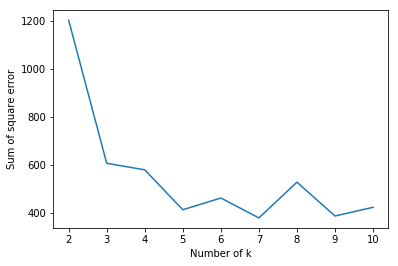

In [19]:
#比較不同k個點(2~10)做為中心時的SSE
SSE0 = []
for k in range(2,11):
    #隨機選k個點
    point_x = [random.uniform(min(t['x']),max(t['x'])) for i in range(k)]
    point_y = [random.uniform(min(t['y']),max(t['y'])) for i in range(k)]
    SSE = []
    while True:
        SSE1 = 0
        x_list = []
        y_list = []
        #預備後面要放不同群的點的空串列
        for i in range(k):
            x_list.append([])
            y_list.append([])
        for i in range(300):
            dis_list = []
            for j in range(k):
                distance = ((t['x'][i] - point_x[j])**2 + (t['y'][i] - point_y[j])**2)**(1/2)
                dis_list.append(distance)
            SSE1 += min(dis_list)
            min_index = dis_list.index(min(dis_list))
            x_list[min_index].append(t['x'][i])
            y_list[min_index].append(t['y'][i])
        SSE.append(SSE1)
        if SSE[len(SSE)-1] == SSE[len(SSE)-2]:
            SSE0.append(SSE1)
            break
        for i in range(k):
            point_x[i] = sum(x_list[i])/len(x_list[i])
            point_y[i] = sum(y_list[i])/len(y_list[i])
#畫折線圖
plt.plot(list(range(2,11)),SSE0)
plt.xlabel('Number of k')
plt.ylabel('Sum of square error')
plt.show()

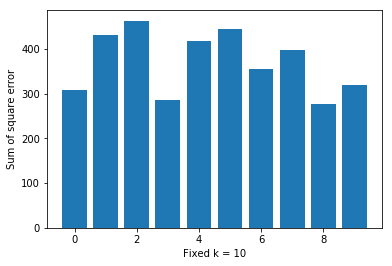

In [20]:
#固定k = 10，做十次下來每次的SSE
SSE0 = []
for k in range(10):
    point_x = [random.uniform(min(t['x']),max(t['x'])) for i in range(10)]
    point_y = [random.uniform(min(t['y']),max(t['y'])) for i in range(10)]
    SSE = []
    while True:
        SSE1 = 0
        x_list = []
        y_list = []
        for i in range(10):
            x_list.append([])
            y_list.append([])
        for i in range(300):
            dis_list = []
            for j in range(10):
                distance = ((t['x'][i] - point_x[j])**2 + (t['y'][i] - point_y[j])**2)**(1/2)
                dis_list.append(distance)
            SSE1 += min(dis_list)
            min_index = dis_list.index(min(dis_list))
            x_list[min_index].append(t['x'][i])
            y_list[min_index].append(t['y'][i])
        SSE.append(SSE1)
        if SSE[len(SSE)-1] == SSE[len(SSE)-2]:
            SSE0.append(SSE1)
            break
        for i in range(10):
            point_x[i] = sum(x_list[i])/len(x_list[i])
            point_y[i] = sum(y_list[i])/len(y_list[i])
plt.bar(list(range(10)),SSE0)
plt.xlabel('Fixed k = 10')
plt.ylabel('Sum of square error')
plt.show()